Utilizzate la linear regression multipla per analizzare il dataframe a questo link https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction utilizzate i dati sulle età delle case e la distanza dalla metro per prevedere il costo della casa , allenate l'algoritmo, testatelo e poi realizzate i vari grafici

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df_or = pd.read_csv("Real estate.csv", index_col=0)
df_or.info()

FileNotFoundError: [Errno 2] No such file or directory: 'Real estate.csv'

In [ ]:
X_or = df_or[["X2 house age","X3 distance to the nearest MRT station"]]
scler = StandardScaler()
X = scler.fit_transform(X_or)
y = df_or["Y house price of unit area"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.coef_)

mse = mean_squared_error(y_test, y_pred)
print("R^2", r2_score(y_test, y_pred))
print("MSE:", mse)

[-2.78623058 -8.65716777]
R^2 0.6003506855979908
MSE: 75.13016920598743


In [ ]:
age_mean = X_test[:,0].mean()
distance_mean = X_test[:,1].mean()

In [ ]:
x_vals1 = np.linspace(X_test[:,0].min(), X_test[:,0].max(), 100)
X_input1 = np.column_stack((x_vals1, np.full_like(x_vals1, distance_mean)))
y_vals1 = model.predict(X_input1)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.65144078 -0.51961573  0.1307212  -0.39657901 -0.40536735 -0.06262221
  1.65989182 -0.0362572  -0.36142566 -0.35263732  1.07986159 -0.97660924
 -0.34384899 -1.55663948  0.0340495  -1.38087274 -0.36142566  1.80050521
 -0.07141054  0.30648794  0.69317477  0.1307212  -0.15929391  1.13259161
 -1.46875611 -0.2032356   0.66680976  0.35042963  1.36108837 -0.88872588
  1.24683999 -0.80963084 -1.55663948  1.20289831 -1.45996777 -1.1084343
 -0.11535223 -0.7744775   2.03779031  1.80929355  0.25375792  0.22739291
  0.71953978  1.56322012  1.38745338 -0.93266756  1.30835835 -1.55663948
 -1.19631767  0.86015317 -1.205106   -0.23838895  0.35042963 -1.09964596
  1.21168664 -0.36142566  1.72141018 -1.24904769 -0.39657901 -0.36142566
 -0.63386411  1.92354193 -0.45809737 -1.21389434  1.50170176  0.18345123
 -1.55663948 -1.19631767 -0.35263732  1.82687023 -0.66901745  0.31527628
  1.94111861  1.01834323 -1.22268268 -1.28420104  1.25562833  1.5104901
 -0.89751421 -0.15929391 -1.09085762 -1.1084343  -1.0381276   0.90409485
 -0.04504553 -0.43173236 -0.41415568 -0.42294402 -0.85357253 -0.18565892
 -1.55663948 -0.1329289  -0.7744775  -1.40723775  1.37866504 -1.55663948
 -1.01176259 -0.14171724  0.12193287 -1.24904769 -1.15237598 -0.44052069
  1.71262185 -0.370214  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

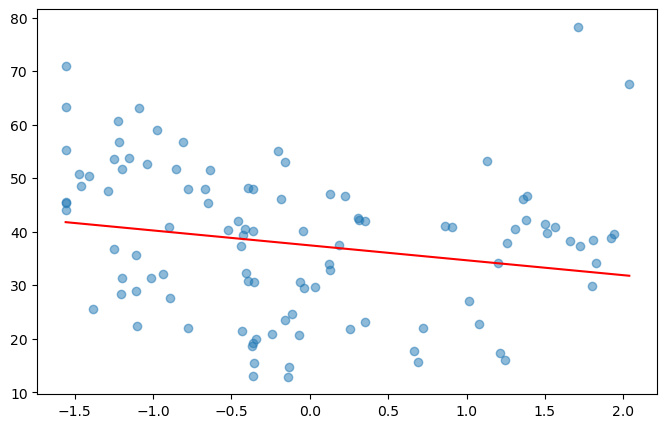

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:,0], y_test, alpha=0.5, label="Dati reali")
plt.plot(x_vals1, y_vals1, color="red", label="Regressione su età della casa")
plt.xlabel("Età")
plt.ylabel("Valore")
plt.title("Valore della casa vs età della casa")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x_vals2 = np.linspace(X_test[:,1].min(), X_test[:,1].max(), 100)
X_input2 = np.column_stack((x_vals2, np.full_like(x_vals2, age_mean)))
y_vals2 = model.predict(X_input2)

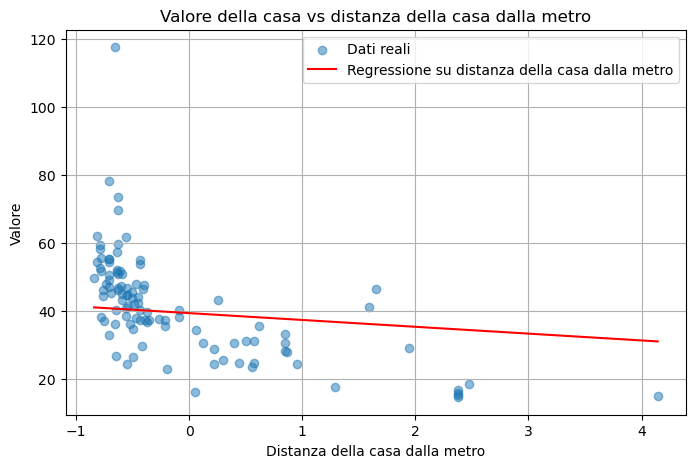

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:,1], y_test, alpha=0.5, label="Dati reali")
plt.plot(x_vals2, y_vals2, color="red", label="Regressione su distanza della casa dalla metro")
plt.xlabel("Distanza della casa dalla metro")
plt.ylabel("Valore")
plt.title("Valore della casa vs distanza della casa dalla metro")
plt.legend()
plt.grid(True)
plt.show()